Now we want to write the Kitaev Honeycomb Lattice Hamiltonian using Fermionic notation

In [147]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import sparse

import Class_site as site
import honeycomb_plot as honey
import importlib
importlib.reload(site)
importlib.reload(honey)

<module 'honeycomb_plot' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/honeycomb_plot.py'>

In [148]:
Npx = 2 # Number of plaquette in each dimension
Npy = 3
model = site.SitesOBC(Npx, Npy)

In [149]:
print("Number of sites:", model.Nsites)
print("array of ordered sites: ", model.ids)
print(model.Nxsites_1)
print(model.Nxsites_2)
print(model.Nyrows)
print(model.partition)

Number of sites: 22
array of ordered sites:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
5
6
4
['A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'A' 'B' 'A' 'B' 'B'
 'A' 'B' 'A' 'B']


In [150]:
#check if the id_to_idxidy function works
idxidy_list = []
for i in model.ids:
    idxidy_list.append(model.id_to_idxidy(i))

idxidy_array = np.array(idxidy_list)
print("List of idx,idy pairs for each site: ", idxidy_array)

List of idx,idy pairs for each site:  [[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]]


In [151]:
#check if idxidy_to_id function works
id_list = []
for idx, idy in idxidy_array:
    id_list.append(model.idxidy_to_id(idx, idy))    

id_array = np.array(id_list)
print("List of ids for each idx,idy pair: ", id_array)

print(model.id_to_idxidy(5))


List of ids for each idx,idy pair:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(0, 1)


In [152]:
9 % 2

1

In [153]:
xx_bond, yy_bond, zz_bond = model.get_bonds()
diagonal_bonds = model.get_diagonalbonds()

In [154]:
print("xx_bond: ", np.array(xx_bond))
print("yy_bond: ", np.array(yy_bond))
print("zz_bond: ", np.array(zz_bond))
print("diagonal_bonds: ", np.array(diagonal_bonds))


xx_bond:  [[ 0  1]
 [ 2  3]
 [ 6  7]
 [ 8  9]
 [11 12]
 [13 14]
 [15 16]
 [18 19]
 [20 21]]
yy_bond:  [[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]
 [13 12]
 [15 14]
 [18 17]
 [20 19]]
zz_bond:  [[ 0  5]
 [ 2  7]
 [ 4  9]
 [ 6 12]
 [ 8 14]
 [10 16]
 [11 17]
 [13 19]
 [15 21]]
diagonal_bonds:  [[ 0  7]
 [ 2  9]
 [ 6 14]
 [ 8 16]
 [11 19]
 [13 21]]


In [155]:
lllist = [3,4,5]
for i, id in enumerate(lllist):
    print(i, id)

0 3
1 4
2 5


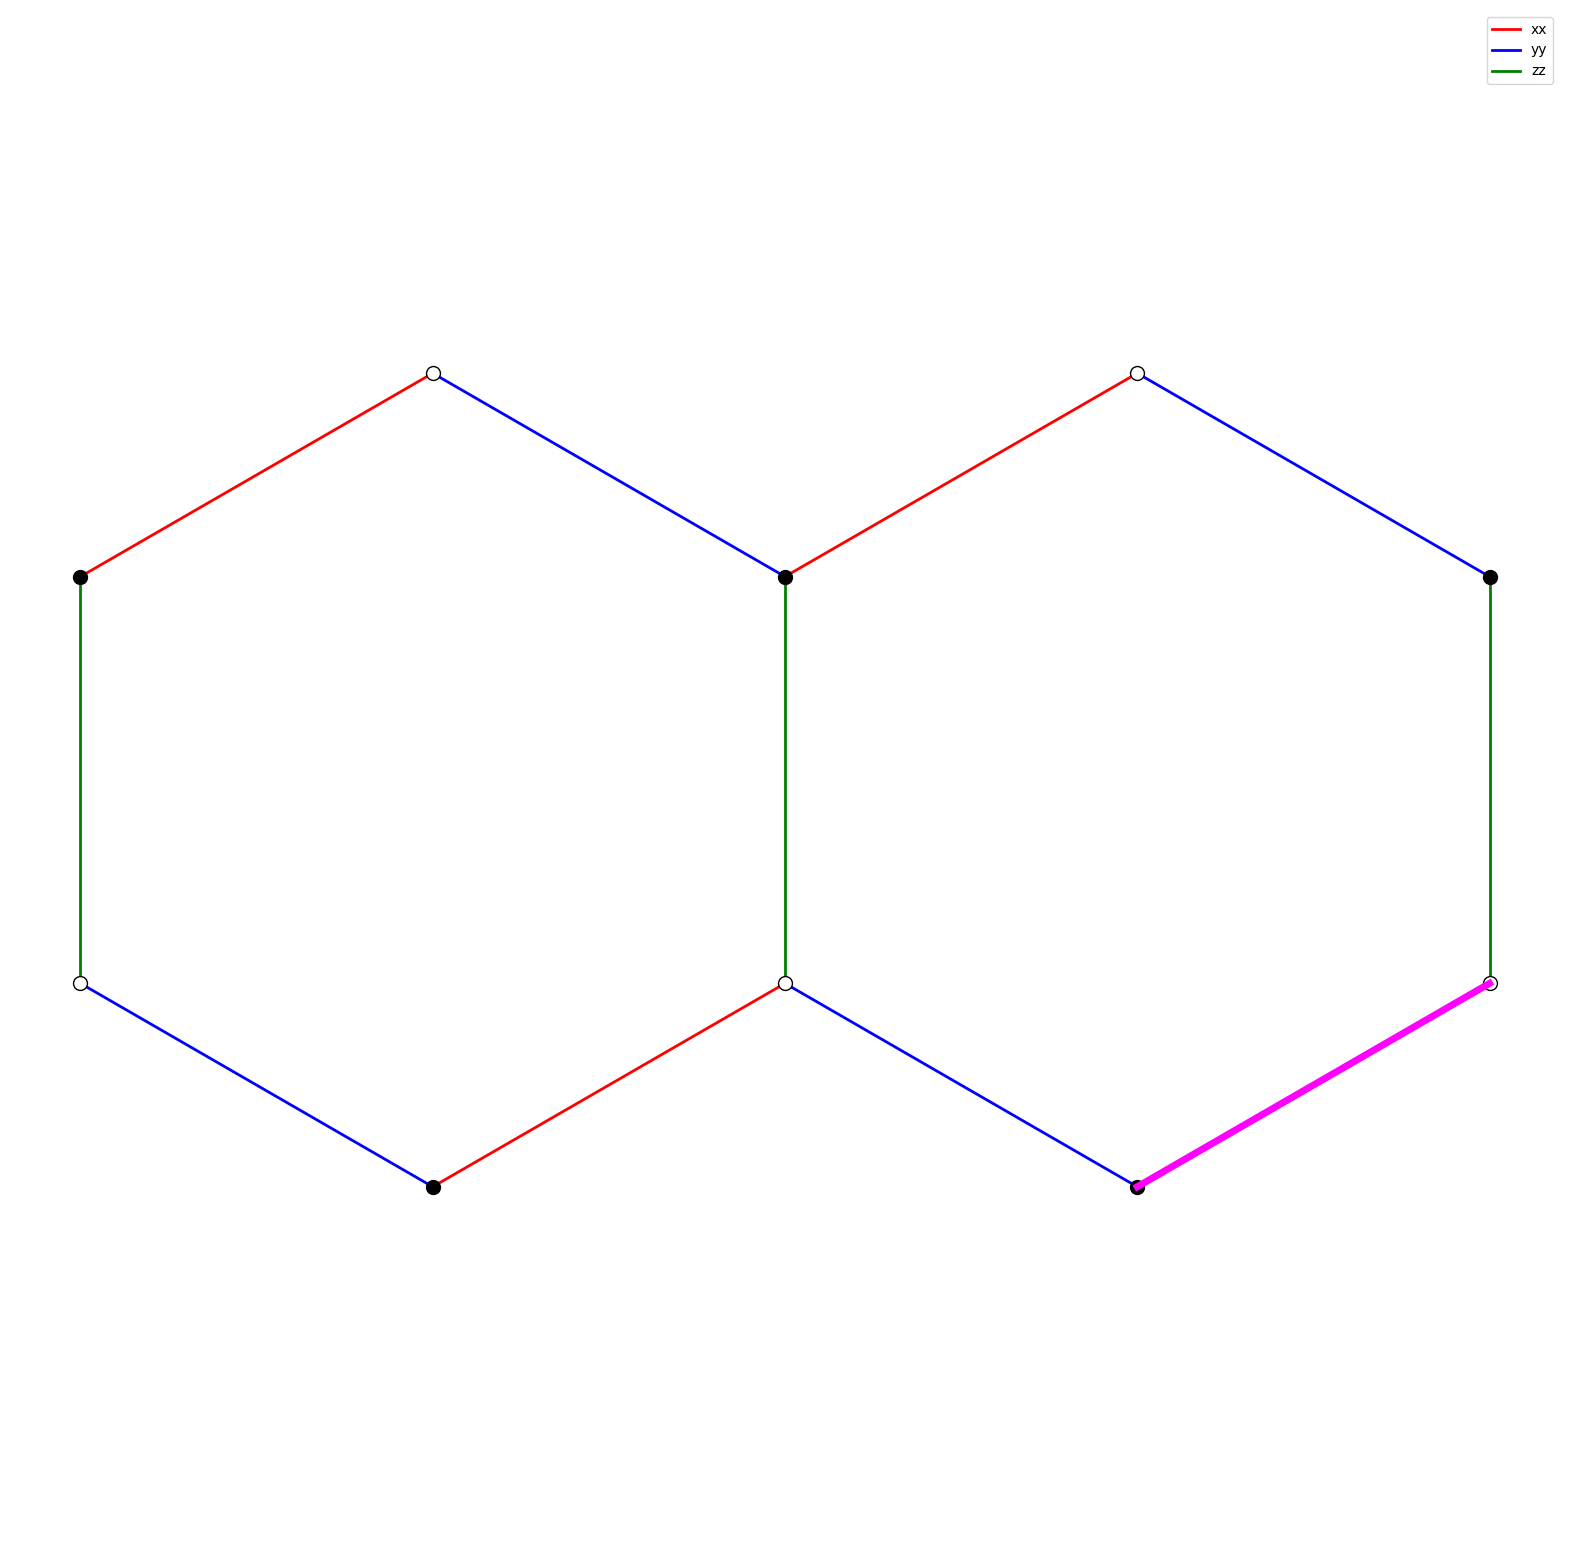

In [156]:
modell = site.SitesOBC(Npx = 2, Npy = 1)
#indices = [14,16,27,28,29,30,41,43] # indices that work well with Npx,Npy = 5 but one line above the ones below
indices = [25,27,38,39,40,41,52,54] # indices that work well with Npx,Npy = 5, exactly fine-tuned to work around central plaquette
honey.plot_honeycomb(modell, plot_anyon_bonds = True, plot_diagonal_bonds=False, 
                     #sites = indices, 
                     # plaquette_site = 40
                     )
#honey.plot_honeycomb(modell, plot_anyon_bonds = False, plot_diagonal_bonds=False, fig_size=(10,10))


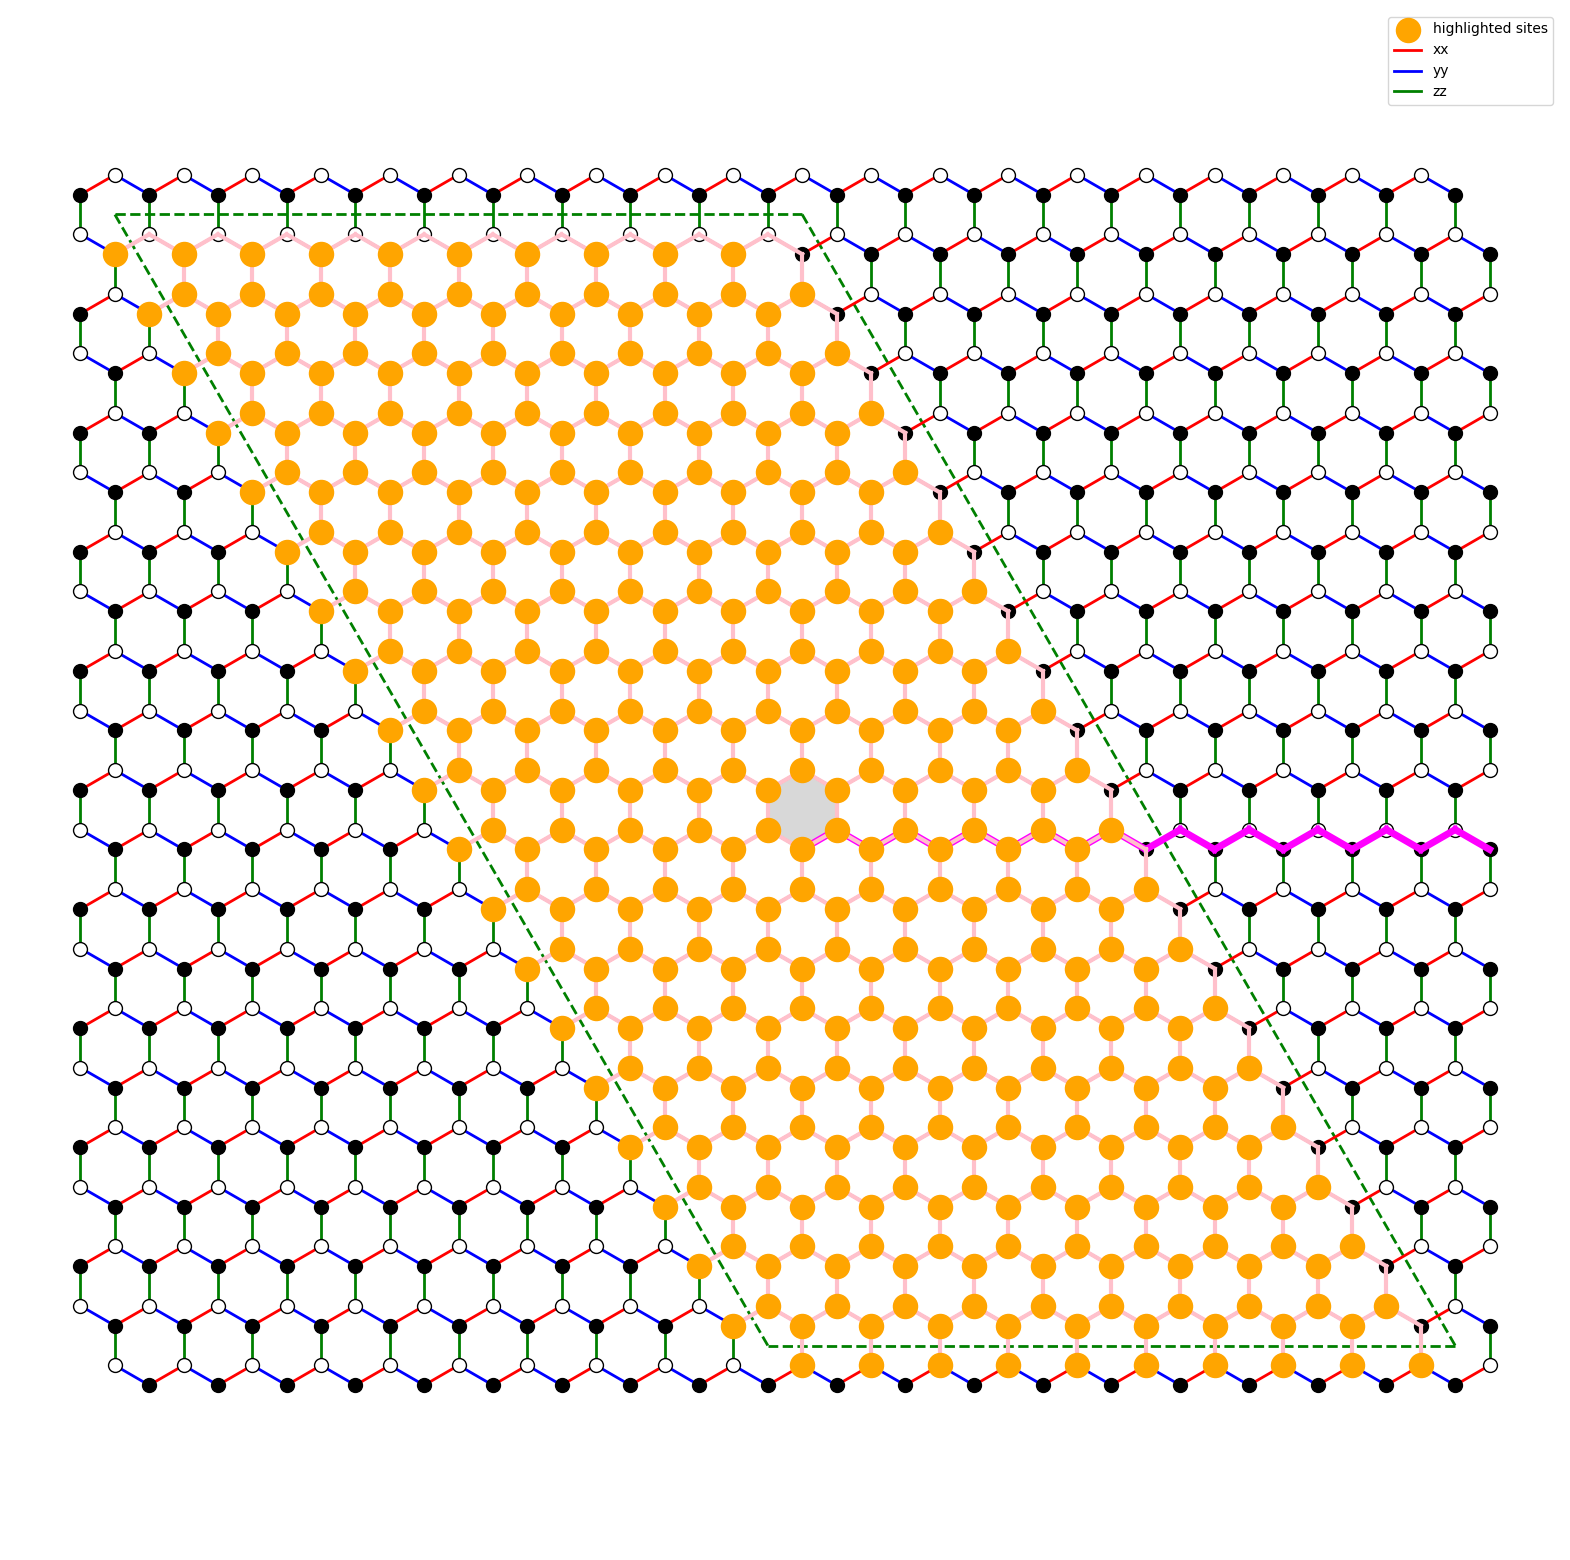

In [157]:
modell = site.SitesOBC(Npx = 20, Npy = 20)
prefactor, loop_indices, links_list, _ = modell.get_loop()

central_plaquette = modell.get_anyonbonds()[1]

honey.plot_honeycomb(modell, plot_anyon_bonds = True,
                    sites = loop_indices, 
                    loop = True,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list)


# Topological Order Parameter

In [158]:
import free_fermion_representation as f
importlib.reload(f)
import pandas as pd

Fine-tuned case:
OBC Npx = 5, Npy = 5, indices = [25,27,38,39,40,41,52,54] or indices = [14,16,27,28,29,30,41,43]


In [169]:
model = site.SitesOBC(Npx=5, Npy=5, index=None)
fgs = f.FermionicGaussianRepresentation(model)

In [170]:
# indices = [14,16,27,28,29,30,41,43]
indices = [25,27,38,39,40,41,52,54]

print(fgs.expectation_val_Majorana_string(indices = indices))

(-1+0j)


In [171]:
model = site.SitesOBC(Npx=12, Npy=10, index=None)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

284


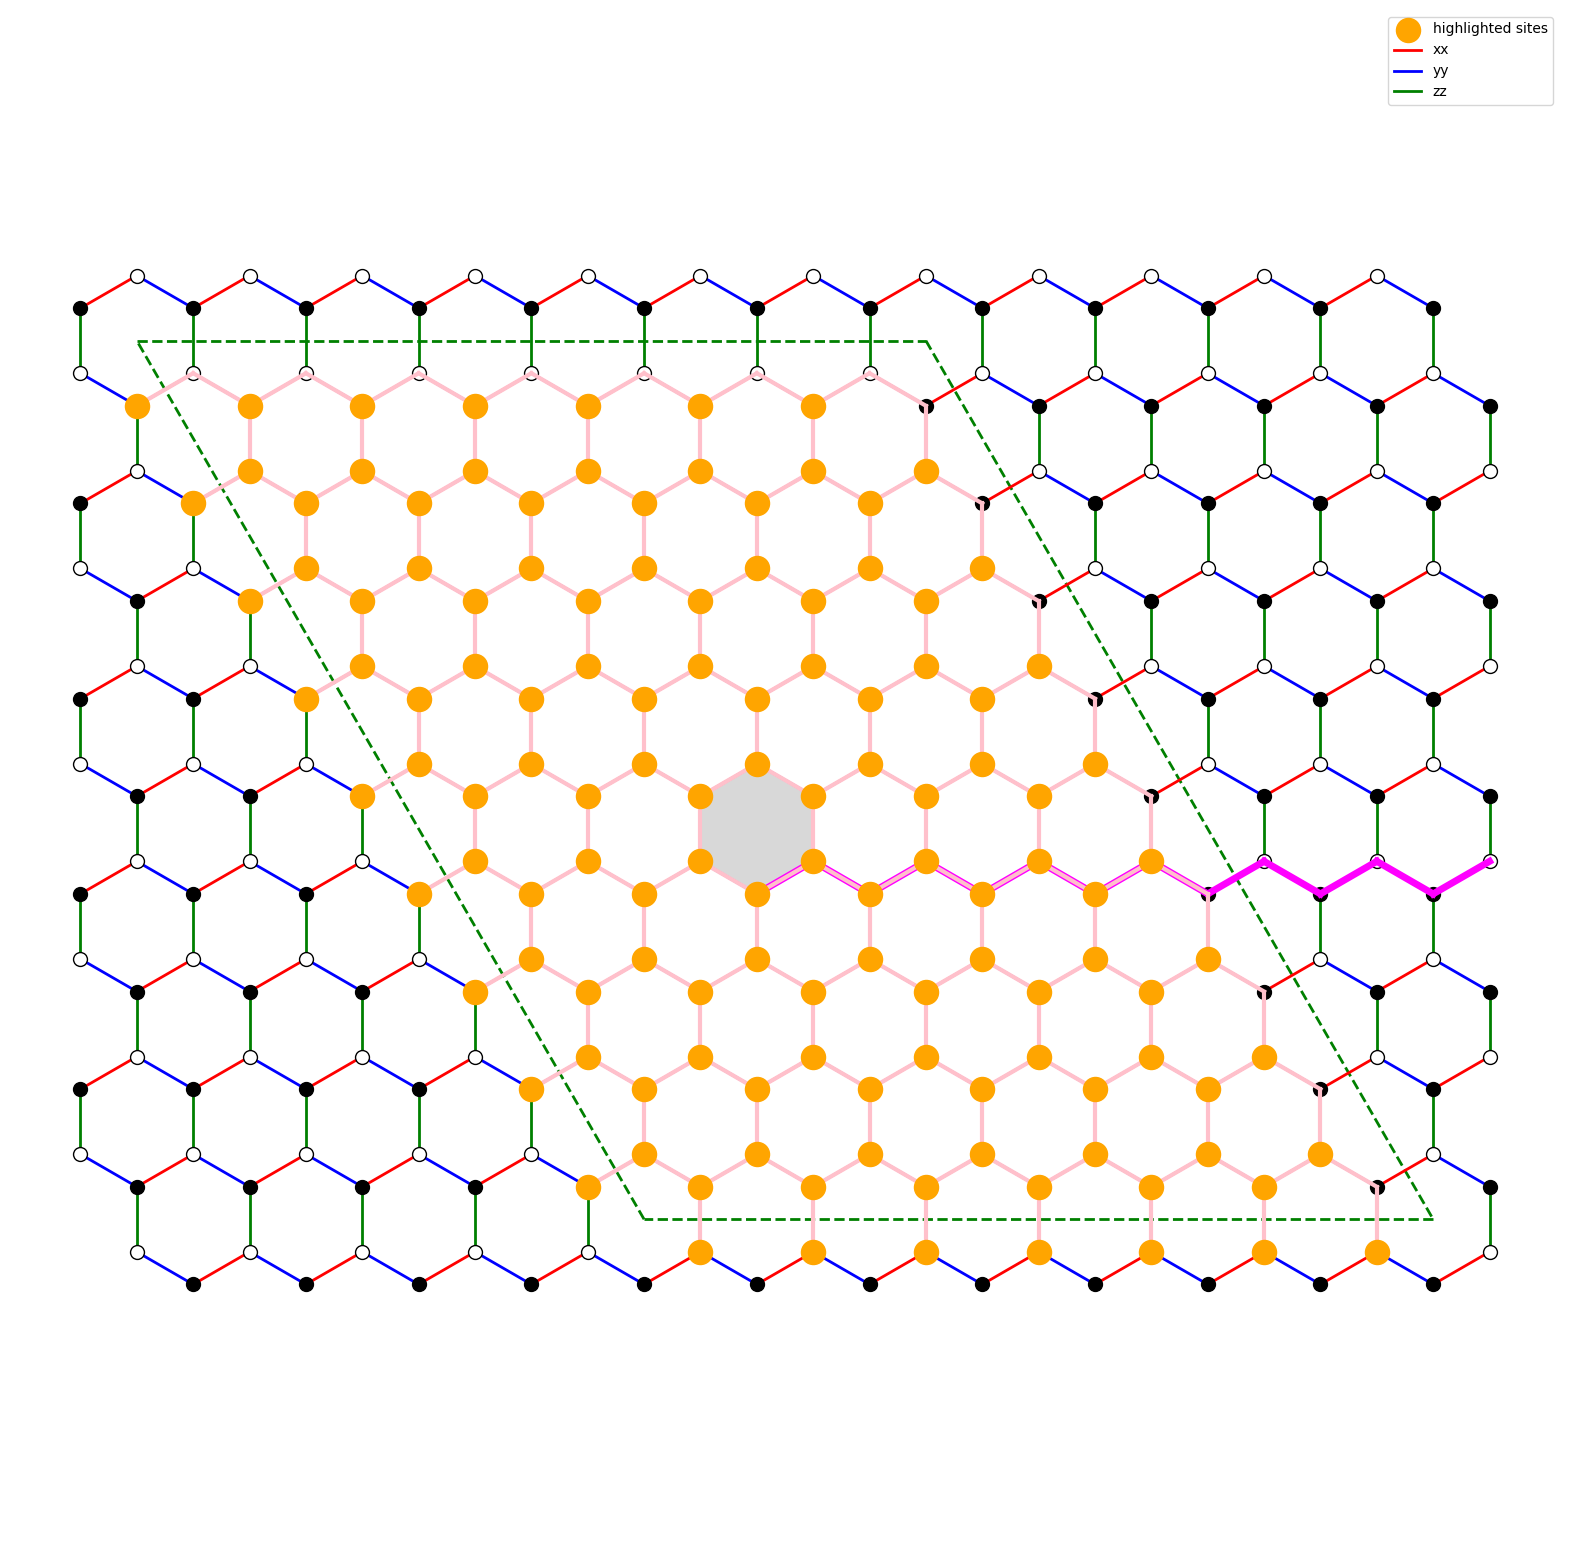

In [172]:
prefactor, loop_indices, links_list, _ = model.get_loop()

central_plaquette = model.get_anyonbonds()[1]

honey.plot_honeycomb(model, plot_anyon_bonds = True,
                    sites = loop_indices, 
                    loop = True,
                    plaquette_site = central_plaquette,
                    otherbonds_list= links_list)

In [173]:
print(prefactor)

1j


In [174]:
dfx = pd.DataFrame(fgs.h0_x)
dfy = pd.DataFrame(fgs.h0_y)
dfz = pd.DataFrame(fgs.h0_z)

print("Hamiltonian h0_x:\n", dfx.round(2))
print("Hamiltonian h0_y:\n", dfy.round(2))
print("Hamiltonian h0_z:\n", dfz.round(2))

Hamiltonian h0_x:
           0         1         2         3         4         5         6    \
0    0.0+0.0j  0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
1   -0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
2    0.0+0.0j  0.0+0.0j  0.0+0.0j  0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
3    0.0+0.0j  0.0+0.0j -0.5+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
4    0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.5+0.0j  0.0+0.0j   
..        ...       ...       ...       ...       ...       ...       ...   
279  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
280  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
281  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
282  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   
283  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   

          7         8         9    ...       274       2

## Majorana notation
R = e^(-4hT)

In [176]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

T = 1
# t = T*np.pi/4.
Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

N = 10
exp_value = []
for i in range(N):
    n = fgs.expectation_value_loop()
    exp_value.append(n)
    print(n)
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)


n = fgs.expectation_value_loop()
exp_value.append(n)
print(n)

(np.complex128(1-0j), np.complex128(1-0j))
(np.complex128(1-0j), np.complex128(-1+0j))
(np.complex128(1-0j), np.complex128(1-0j))
(np.complex128(1-0j), np.complex128(-1+0j))
(np.complex128(1-0j), np.complex128(1-0j))
(np.complex128(1-0j), np.complex128(-1+0j))
(np.complex128(1-0j), np.complex128(1-0j))
(np.complex128(1-0j), np.complex128(-1+0j))
(np.complex128(1-0j), np.complex128(1-0j))
(np.complex128(1-0j), np.complex128(-1+0j))
(np.complex128(1-0j), np.complex128(1-0j))


In [177]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

T = 0.8
# t = T*np.pi/4.
Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

N = 10
exp_value = []
for i in range(N):
    n = fgs.order_parameter()
    exp_value.append(n)
    print(n)
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)


n = fgs.order_parameter()
exp_value.append(n)
print(n)

(1+0j)
(-0.9999999999999991+0j)
(0.9999999999981436+0j)
(-0.9999999934258786+0j)
(1.0002898240863474+0j)
(-0.9952580733877358+0j)
(0.9773258578617395+0j)
(-0.979196307894564+0j)
(0.9208053093727973+0j)
(-0.8599149463136454+0j)
(0.8533048265257879+0j)


## Dirac notation
(wrong for now)

In [166]:
# t = np.pi/12
# fgs.update_corr_matrix(He_x,t)
# fgs.update_corr_matrix(He_y,t)
# fgs.update_corr_matrix(He_z,t)

# fgs.Cov = fgs.corr_to_cov()

# print(fgs.expectation_val_Majorana_string(loop))


/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Measurement of Loop operator O under Floquet drive')

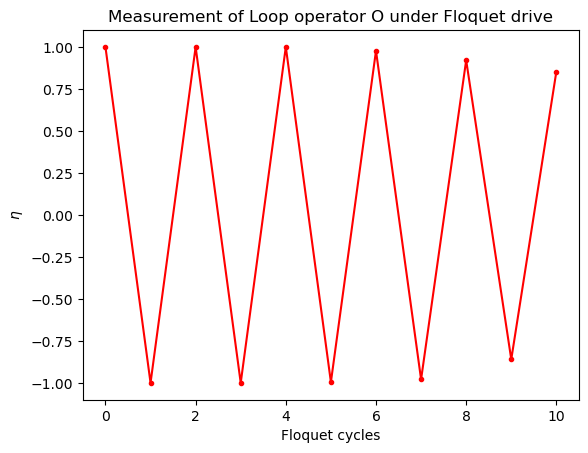

In [178]:
plt.plot(range(N+1), exp_value, '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")